Answer of Q1(Which of these are stationary)
1. The graph d,h,i shows the prominent seasonality, so they are not stationary.
2. Graph i also shows increasing variance so it is not stationary.
2. The graph a,c,e,f shows trends, so they are not stationary as they violates the trends and changing in series.
3. The graph g is stationary as the cycles in graph are aperiodic, which makes it stationary.The graph b is stationary as differencing makes graph stationary and this graph is the difference of graph A. 

In [46]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
filename = "./data/google_stock.csv"

In [47]:
data = pd.read_csv(filename)

In [48]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2013,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,1/3/2013,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,1/4/2013,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,1/7/2013,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,1/8/2013,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [49]:
x = data.Date

In [50]:
date_objects = [datetime.strptime(x, '%m/%d/%Y').date() for x in x]

In [51]:
def subplot_(X,Y,i,j,title,xlabel,ylabel,label,ax_arr,color='b'):
    ax_arr[i,j].plot(X, Y, color, label = label)
# ax_arr[0,i]jplot([0, 1], [0, 1],'r--')
    ax_arr[i,j].set_title(title,fontsize=20)
    ax_arr[i,j].set_ylabel(ylabel,fontsize=20)
    ax_arr[i,j].set_xlabel(xlabel,fontsize=15)
    ax_arr[i,j].legend(loc = 'best', prop={'size': 16})
#     return ax_arr

In [52]:
list(set(data.columns).difference(set('Date')))

['Adj Close', 'High', 'Close', 'Date', 'Volume', 'Open', 'Low']

In [53]:
headings = []
for i in data.columns:
    if i != 'Date':
        headings.append(i)
    

In [54]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

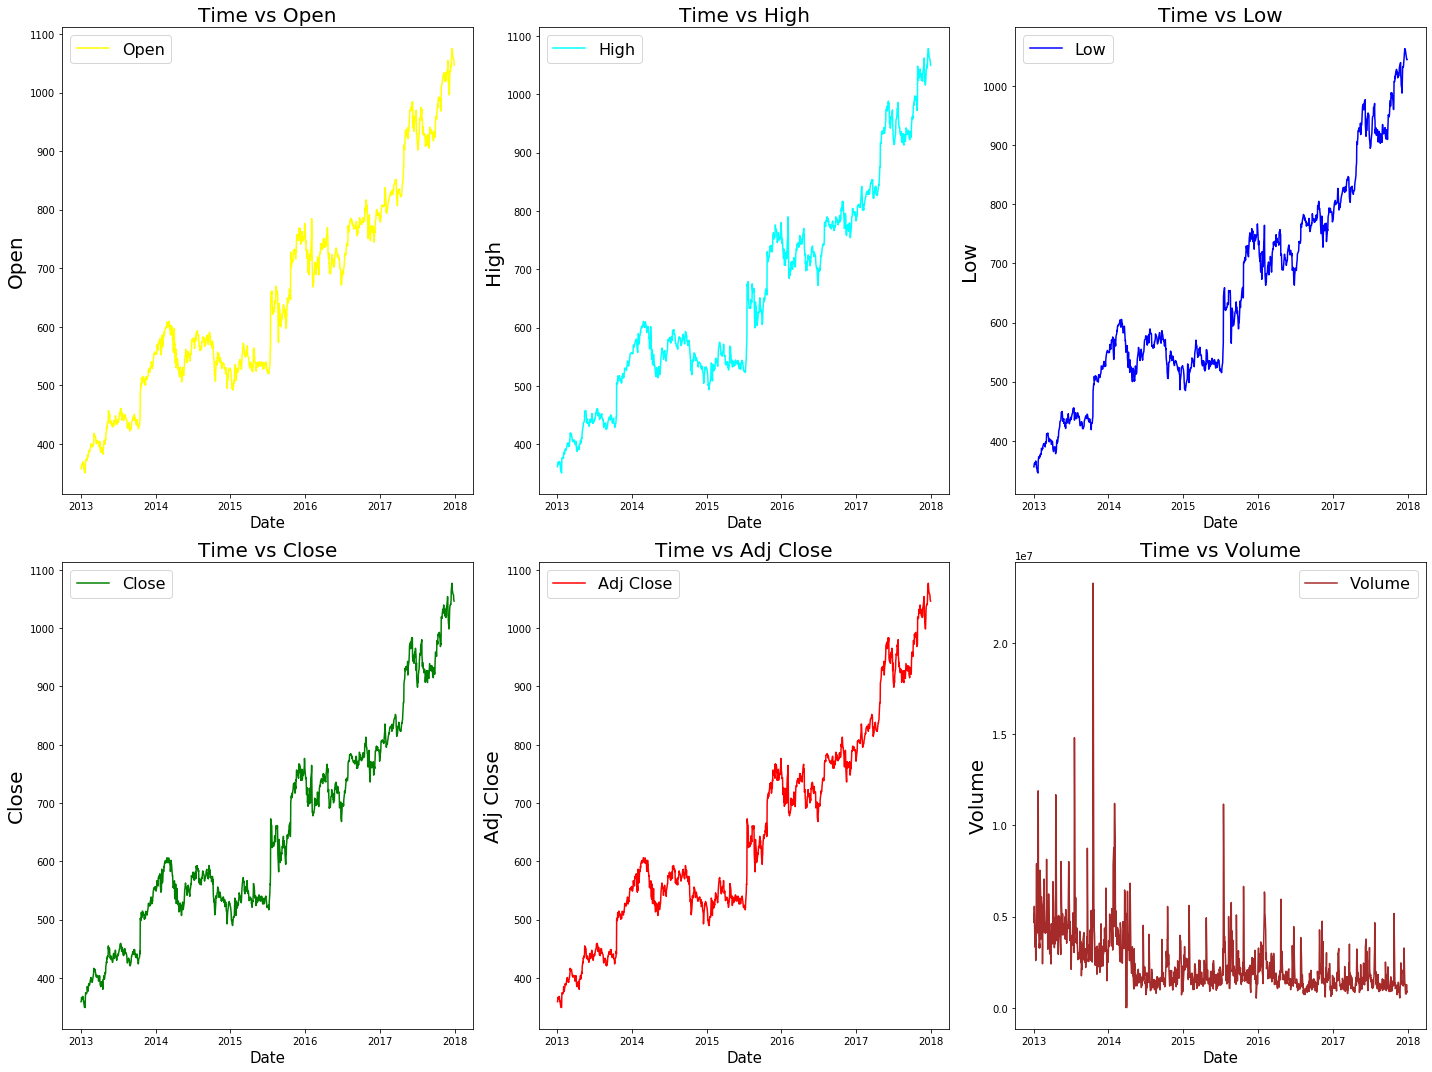

In [55]:
# headings = ['Close', 'Adj Close', 'High', 'Volume', 'Low', 'Open']
index = 0
colors = ['yellow','cyan','blue','green','red','brown']
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))
for row in range(0,2):
    for col in range(0,3):
        subplot_(X=date_objects,Y=data[headings[index]],i=row,j=col,title="Time vs " +headings[index],
                 xlabel="Date",ylabel=headings[index],label=headings[index],ax_arr=ax_arr,color=colors[index])
        index+=1
plt.subplots_adjust(wspace=0.2)
plt.tight_layout()

In [56]:
from pandas.plotting import lag_plot,autocorrelation_plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
data_2 = pd.read_csv(filename,header=0,index_col=0)

In [57]:
# lag_plot(data_2)

In [58]:
# autocorrelation_plot(data_2)

In [59]:
# data_2.columns

In [60]:
from statsmodels.tsa.stattools import kpss

for i in headings:
        print("Testing for the feature : "+str(i))
        X = data_2[i]
        test = kpss(X)
        output = pd.Series(test[0:3], index=['Test Statistic','p-value','Number of Lags Used'])
        for key,value in test[3].items():
            output['critical value (%s)'%key] = value
        print (output)

Testing for the feature : Open
Test Statistic            4.857621
p-value                   0.010000
Number of Lags Used      23.000000
critical value (10%)      0.347000
critical value (5%)       0.463000
critical value (2.5%)     0.574000
critical value (1%)       0.739000
dtype: float64
Testing for the feature : High
Test Statistic            4.858573
p-value                   0.010000
Number of Lags Used      23.000000
critical value (10%)      0.347000
critical value (5%)       0.463000
critical value (2.5%)     0.574000
critical value (1%)       0.739000
dtype: float64
Testing for the feature : Low
Test Statistic            4.860304
p-value                   0.010000
Number of Lags Used      23.000000
critical value (10%)      0.347000
critical value (5%)       0.463000
critical value (2.5%)     0.574000
critical value (1%)       0.739000
dtype: float64
Testing for the feature : Close
Test Statistic            4.859777
p-value                   0.010000
Number of Lags Used      2

In [61]:
headings

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [62]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2013,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,1/3/2013,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,1/4/2013,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,1/7/2013,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,1/8/2013,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [63]:
new_data  = data
for i in headings:
        new_data[i] = np.log(new_data[i])
        new_data[i] = (new_data[i]  - new_data[i] .shift(1) ).fillna(new_data[i].mode()[0])

for i in headings:
        print("Testing for the feature : "+str(i))
        X = new_data[i]
        test = kpss(X)
        output = pd.Series(test[0:3], index=['Test Statistic','p-value','Number of Lags Used'])
        for key,value in test[3].items():
            output['critical value (%s)'%key] = value
        print (output)



Testing for the feature : Open
Test Statistic            0.339304
p-value                   0.100000
Number of Lags Used      23.000000
critical value (10%)      0.347000
critical value (5%)       0.463000
critical value (2.5%)     0.574000
critical value (1%)       0.739000
dtype: float64
Testing for the feature : High
Test Statistic            0.340111
p-value                   0.100000
Number of Lags Used      23.000000
critical value (10%)      0.347000
critical value (5%)       0.463000
critical value (2.5%)     0.574000
critical value (1%)       0.739000
dtype: float64
Testing for the feature : Low
Test Statistic            0.33943
p-value                   0.10000
Number of Lags Used      23.00000
critical value (10%)      0.34700
critical value (5%)       0.46300
critical value (2.5%)     0.57400
critical value (1%)       0.73900
dtype: float64
Testing for the feature : Close
Test Statistic            0.339907
p-value                   0.100000
Number of Lags Used      23.00000

In [64]:
data_2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1/2/2013,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1/3/2013,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
1/4/2013,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
1/7/2013,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
1/8/2013,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [16]:
from statsmodels.tsa.arima_model import ARMA

def arma_model_fit(X):
    model = ARMA(X,order =(7,1))
    model_fit = model.fit(disp=0)
    print(model_fit.summary())
    forecast = model_fit.forecast(steps=7)[0]
    for i in range(len(forecast)):
        print('Day %d: %f' % ((i+1), forecast[i]))    
    
for i in headings:
        print("Model fit and forecast : "+str(i))
#         model_fit = 
        arma_model_fit(data_2[i])
        print ("Predictability of %s values for next 7 days : " % str(i))
#         forecast(model_fit)

Model fit and forecast : Open
                              ARMA Model Results                              
Dep. Variable:                   Open   No. Observations:                 1259
Model:                     ARMA(7, 1)   Log Likelihood               -4561.485
Method:                       css-mle   S.D. of innovations              9.037
Date:                Tue, 29 Oct 2019   AIC                           9142.970
Time:                        22:49:16   BIC                           9194.351
Sample:                             0   HQIC                          9162.279
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        690.0539    272.148      2.536      0.011     156.655    1223.453
ar.L1.Open     1.1146      0.019     59.110      0.000       1.078       1.152
ar.L2.Open    -0.0990 

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1259
Model:                     ARMA(7, 1)   Log Likelihood               -4521.623
Method:                       css-mle   S.D. of innovations              8.744
Date:                Tue, 29 Oct 2019   AIC                           9063.246
Time:                        22:49:51   BIC                           9114.627
Sample:                             0   HQIC                          9082.555
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2167.8460        nan        nan        nan         nan         nan
ar.L1.Close     0.2283        nan        nan        nan         nan         nan
ar.L2.Close     0.8056        nan        nan    

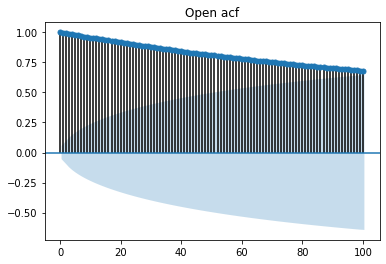

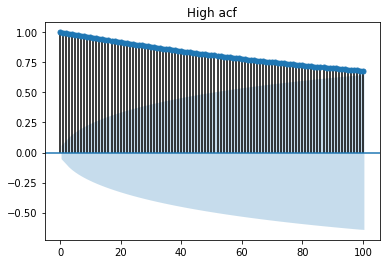

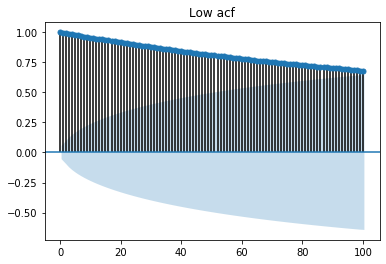

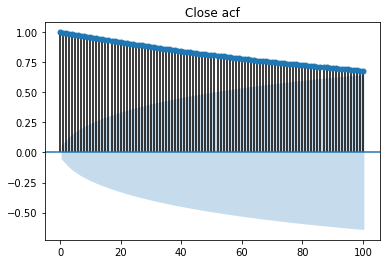

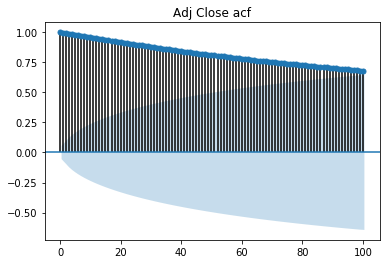

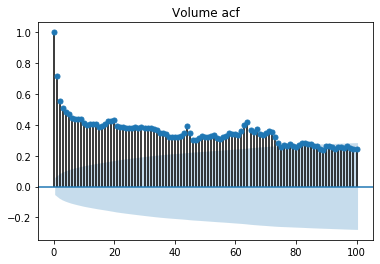

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
lags = 100
for i in headings:
    plot_acf(data_2[i],title=i+ " acf",lags=lags)

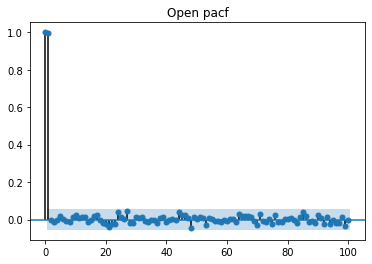

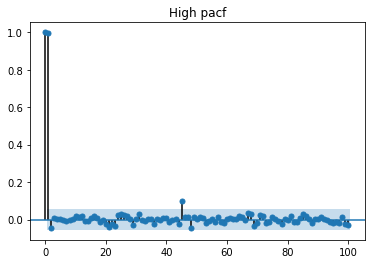

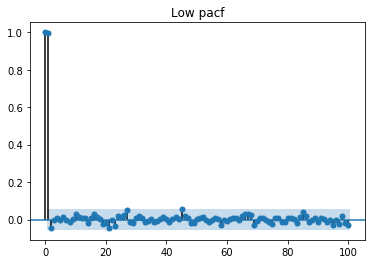

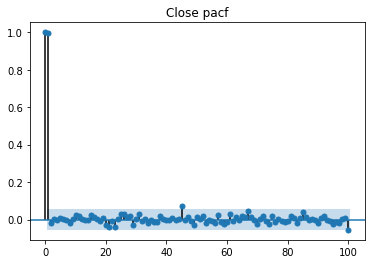

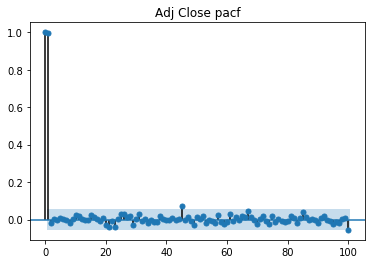

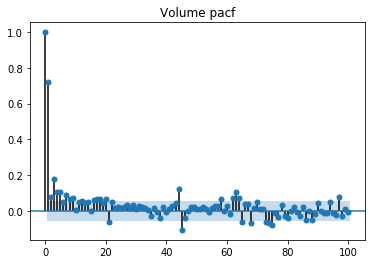

In [18]:
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
for i in headings:
    plot_pacf(data_2[i],title=i + " pacf",lags=lags)